# Funciones necesarias para el análisis de datos 



In [14]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
%matplotlib inline

def Error_linealizacion(x,y):
    yp = np.mean(y)*np.ones(len(y))
    ei2 = np.sum((y-yp)**2)
    ey = np.sqrt(ei2/(len(y)-2))
    xi2 = np.sum(x**2); Xi2 = np.sum(x)**2
    db = ey*np.sqrt((len(y))/(len(y)*xi2-Xi2)) #pendiente
    da = ey*np.sqrt((xi2)/(len(y)*xi2-Xi2)) #punto de corte
    return np.array([da,db])


def EscalaVoltaje(x):
    return (x/3.5)  #Pascales

# Datos obtenidos en el laboratorio

## Temperatura constante

-0.40273842352363326


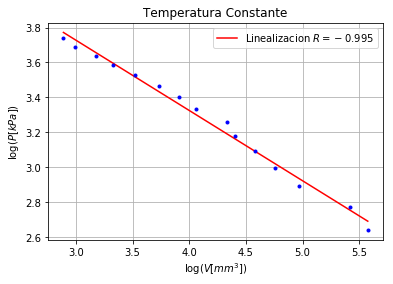

In [2]:
P1 = np.arange(14,46,2)
V1 = np.array([264.,226.,144.,116.,98.,82.,76.,58.,50.,42.,34.,28.,24.,20.,18.,10.])

LP1 = np.log(P1)[:-1]
LV1 = np.log(V1)[:-1]


slopet, interceptt, r_valuet, p_valuet, std_errt = sp.stats.linregress(LV1,LP1)
polynomial = np.poly1d([slopet, interceptt])
line = polynomial(LV1)


yErr = 0.01; tc1Err = 0.01
plt.plot(LV1, line, 'r-', label ="Linealizacion $R ={0:.3f}$".format(r_valuet)) 
plt.plot(LV1,LP1,"b.")
#plt.errorbar(LV1, LP1, yErr, tc1Err,ecolor = "b",fmt='+b',capsize = 2)
plt.legend()
plt.title("Linealizacion Temperatura Vs tiempo cilindro 3")
plt.ylabel("$ \ln((T(t)-T_{f})/(T_{i}-T_{f}))$")
plt.xlabel("t[s]")
plt.grid(True)

#plt.plot(np.log(V1)[:-1],np.log(P1)[:-1],"k.")
#plt.plot(V1,P1,"b.")
plt.xlabel("$\log(V [mm^{3}])$")
plt.ylabel("$\log(P[kPa])$")
plt.title("Temperatura Constante")
plt.grid(True)

print slopet

plt.savefig("Lin_Tcte")

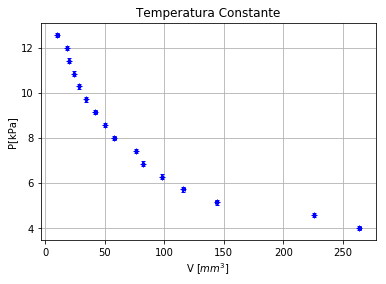

In [3]:
V1Err = 1; P1Err = 0.1
plt.plot(V1,EscalaVoltaje(P1),"b.")
plt.errorbar(V1, EscalaVoltaje(P1), P1Err, V1Err,ecolor = "b",fmt='+b',capsize = 2)
plt.xlabel("V [$mm^{3} $]")
plt.ylabel("P[kPa]")
plt.title("Temperatura Constante")
plt.grid(True)

plt.savefig("Tcte")

## Presión constante

Pendiente:  0.3451868131868132 Error:  0.1005248914141429
Punto de corte:  40.87692307692306 Error:  4.279693038210593


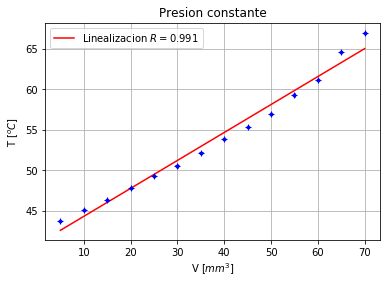

In [4]:
T = np.array([81.1,73.1,69.9,67.,64.6,61.2,59.3,57.,55.4,53.9,52.2,50.6,49.3,47.8,46.3,45.1,43.8])#C
V = np.linspace(85,5,85/5)

slopep, interceptp, r_valuep, p_valuep, std_errp = sp.stats.linregress(V[3:],T[3:])
polynomial = np.poly1d([slopep, interceptp])
line = polynomial(V[3:])


yErr = 0.01; tc1Err = 0.01
plt.plot(V[3:], line, 'r-', label ="Linealizacion $R ={0:.3f}$".format(r_valuep)) 
plt.plot(V[3:],T[3:],"b.")
plt.errorbar(V[3:], T[3:], yErr, tc1Err,ecolor = "b",fmt='+b',capsize = 2)
plt.legend()

plt.grid(True)
plt.xlabel("V [$mm^{3} $]")
plt.ylabel("T [$^{o}C$]")
plt.title("Presion constante")

plt.savefig("pCte")

print "Pendiente: " ,slopep, "Error: ", Error_linealizacion(V[3:],T[3:])[1]
print "Punto de corte: ", interceptp, "Error: ", Error_linealizacion(V[3:],T[3:])[0]

## Volumen constante



Pendiente:  0.3243021346469622 Error:  0.06365036591826419
Punto de corte:  -17.370982875908986 Error:  5.022937482710829
Se encuentran las componentes de Fourier
constante b =  0.09351754319530793
constante a =  -4.342745718977246e-14


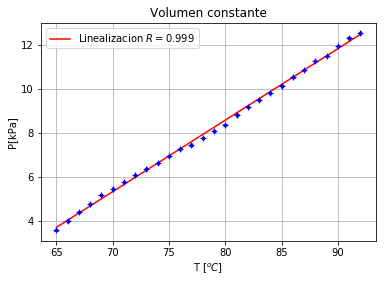

In [18]:
T = np.linspace(92.,65.,93-65)
P = np.array([43.8,43.1,41.8,40.2,39.4,38.,36.8,35.5,34.3,33.2,32.1,30.9,29.3,28.3,27.2,26.,25.5,24.3,23.2,22.3,21.3,20.2,19.1,18.1,16.7,15.4,14.,12.5])

slopev, interceptv, r_valuev, p_valuev, std_errv = sp.stats.linregress(T,EscalaVoltaje(P))
polynomial = np.poly1d([slopev, interceptv])
line = polynomial(T)


yErr = 0.01; tc1Err = 0.01
plt.plot(T, line, 'r-', label ="Linealizacion $R ={0:.3f}$".format(r_valuev)) 
plt.plot(T,EscalaVoltaje(P),"b.")
plt.errorbar(T, EscalaVoltaje(P), yErr, tc1Err,ecolor = "b",fmt='+b',capsize = 2)
plt.legend()





#plt.plot(T,EscalaVoltaje(P),"b.")
plt.grid(True)
plt.xlabel("T [$^{o}C$]")
plt.ylabel("P[kPa]")
plt.title("Volumen constante")


plt.savefig("Vcte")



print "Pendiente: " ,slopev, "Error: ", Error_linealizacion(T,EscalaVoltaje(P))[1]
print "Punto de corte: ", interceptv, "Error: ", Error_linealizacion(T,EscalaVoltaje(P))[0]

R = 8.3144 # J/(K.mol)
V = 50.e-9
print "Se encuentran las componentes de Fourier"

print "constante b = " , (slopev*274.15*V + R)/(slopev*274.15)
print "constante a = ", interceptv*V**2

## Ecuación de Van der Waals

$$\left(P+a\frac{N^{2}}{V^{2}}\right)(V-Nb) = NRT$$

### Puntos críticos

In [7]:
import sympy as sp
from sympy import init_printing
init_printing(use_unicode = True)
from IPython.core.display import display, Math
from sympy.abc import*

P = N*R*T/(V-N*b) - a*((N**2)/(V**2))
Vc,Tc = sp.solve([sp.Eq(P.diff(V),0), sp.Eq(P.diff(V,V),0)], [V, T])[0]
Pc = P.subs(V,Vc).subs(T,Tc)
display(Math('V_{c} = '+sp.latex(Vc)))
display(Math('T_{c} = '+sp.latex(Tc)))
display(Math('P_{c} = '+sp.latex(P.subs(V,Vc).subs(T,Tc))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

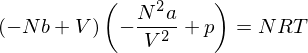

In [8]:
sp.Eq(((p- a*((N**2)/(V**2)))*(V-N*b)),N*R*T)


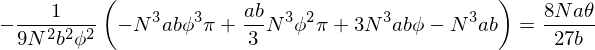

In [9]:
sp.Eq(sp.cancel((p- a*((N**2)/(V**2)))*(V-N*b)),N*R*T).subs(V,phi*Vc).subs(p,pi*Pc).subs(T,theta*Tc)

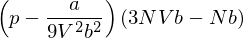

In [10]:
((p- a*((N**2)/(V**2)))*(V-N*b)).subs(V,V*Vc)

In [11]:
def p(v,t):
    return ((8.*t)/(3.*v - 1.) - (3.)/(v**2))

def pi(v,t):
    return (8.*t)/(3*v)

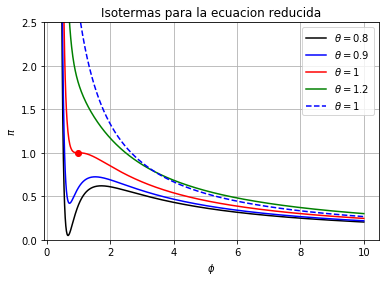

In [12]:
Phi = np.linspace(0.4,10,1000)

plt.plot(Phi,p(Phi,0.85),"k-",label = "$\\theta = 0.8$")
plt.plot(Phi,p(Phi,0.9),"b-",label = "$\\theta = 0.9$")
plt.plot(Phi,p(Phi,1.0),"r-",label = "$\\theta = 1$")
plt.plot(Phi,p(Phi,1.2),"g-",label = "$\\theta = 1.2$")
plt.plot(1,1,"ro")

plt.plot(Phi,pi(Phi,1.),"b--",label = "$\\theta = 1$")

plt.grid(True)
plt.legend()
plt.ylim(0,2.5)
plt.xlabel("$\\phi$")
plt.ylabel("$\\pi$")
plt.title("Isotermas para la ecuacion reducida")

sp.solve(sp.Eq((8.*1.2)/(3.*v - 1.) - (3.)/(v**2),1.5),v)



#plt.savefig("isotermas")

In [ ]:
V1